In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 

import numpy as np
import pandas as pd

from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score

SOME IMPORTANT FUNCTIONS

In [2]:
def plot_roc_curve(fpr, tpr,auc):
    plt.plot(fpr, tpr, color='orange', label='ROC -AUC %.2f' %auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.grid()
    plt.legend()
    plt.show()
def analize_data(X_text,y_test,predictions,probs):
    print(pd.DataFrame(confusion_matrix(y_test, predictions), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive']))
    print("\n")
    print(classification_report(y_test,predictions))
    probs=probs[:,1]
    auc = roc_auc_score(y_test, probs)
   
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plot_roc_curve(fpr, tpr,auc)
    return auc

def plot_hist(classification,hist_value,data,bins,size,numeric=False):
    plt.figure(figsize=size)
    if numeric:
        plt.xticks(np.arange(0, max(data[hist_value]), max(data[hist_value]/20)))
    data[data[classification]==0][hist_value].hist(alpha=0.9,color='red',bins=bins)
    data[data[classification]==1][hist_value].hist(alpha=0.3,color='blue',bins=bins)

In [3]:
file = 'C:\\Users\\Forex1\\Desktop\\AI\\ml-german-credit\\data\\german.data'


names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

data = pd.read_csv(file,names = names, delimiter=' ')
print(data.shape)
print (data.columns)
data.head(10)

(1000, 21)
Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'employmentsince', 'installmentrate',
       'statussex', 'otherdebtors', 'residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'classification'],
      dtype='object')


,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [4]:
data['classification'].replace([1,2], [1,0], inplace=True)
data['classification'].value_counts()


1    700
0    300
Name: classification, dtype: int64

For simplify binary classification

0 - BAD CLIENT
1 -GOOD CLIENT

In [5]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [6]:
#numerical variables labels
numvars = ['creditamount', 'duration', 'installmentrate', 'residencesince', 'age', 
           'existingcredits', 'peopleliable']



In [7]:
data[numvars].describe()

,creditamount,duration,installmentrate,residencesince,age,existingcredits,peopleliable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3271.258000,20.903000,2.973000,2.845000,35.546000,1.407000,1.155000
std,2822.736876,12.058814,1.118715,1.103718,11.375469,0.577654,0.362086
min,250.000000,4.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,1365.500000,12.000000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,2319.500000,18.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,3972.250000,24.000000,4.000000,4.000000,42.000000,2.000000,1.000000
max,18424.000000,72.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
# Standardization
numdata_std = pd.DataFrame(MinMaxScaler().fit_transform(data[numvars]),columns=numvars)

In [9]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

#categorical variables labels
catvars = ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince',
           'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job', 
           'telephone', 'foreignworker']

d = defaultdict(LabelEncoder)

# Encoding the variable
catdata = data[catvars].apply(lambda x: d[x.name].fit_transform(x))
#catdata_std =pd.DataFrame(MinMaxScaler().fit_transform(catdata),columns=catvars)

In [10]:
catdata=pd.get_dummies(data[catvars],drop_first=True)
catdata

,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A41,purpose_A410,purpose_A42,...,property_A124,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreignworker_A202
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,1,0,0,0,0,1,...,0,0,1,1,0,1,0,0,0,0
996,0,0,0,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,1,1,0
997,0,0,1,0,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
998,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [11]:
data_prep = pd.concat([numdata_std, catdata,data['classification']], axis = 1)

In [12]:
data_prep

,creditamount,duration,installmentrate,residencesince,age,existingcredits,peopleliable,existingchecking_A12,existingchecking_A13,existingchecking_A14,...,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreignworker_A202,classification
0,0.050567,0.029412,1.000000,1.000000,0.857143,0.333333,0.0,0,0,0,...,0,1,1,0,0,1,0,1,0,1
1,0.313690,0.647059,0.333333,0.333333,0.053571,0.000000,0.0,1,0,0,...,0,1,1,0,0,1,0,0,0,0
2,0.101574,0.117647,0.333333,0.666667,0.535714,0.000000,1.0,0,0,1,...,0,1,1,0,1,0,0,0,0,1
3,0.419941,0.558824,0.333333,1.000000,0.464286,0.000000,1.0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
4,0.254209,0.294118,0.666667,1.000000,0.607143,0.333333,1.0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.081765,0.117647,0.666667,1.000000,0.214286,0.000000,0.0,0,0,1,...,0,1,1,0,1,0,0,0,0,1
996,0.198470,0.382353,1.000000,1.000000,0.375000,0.000000,0.0,0,0,0,...,0,1,1,0,0,0,1,1,0,1
997,0.030483,0.117647,1.000000,1.000000,0.339286,0.000000,0.0,0,0,1,...,0,1,1,0,0,1,0,0,0,1
998,0.087763,0.602941,1.000000,1.000000,0.071429,0.000000,0.0,0,0,0,...,0,1,0,1,0,1,0,1,0,0


In [13]:
from sklearn.model_selection import train_test_split  

X = data_prep.drop('classification', axis=1)
y = data_prep['classification']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111)

#X_u = data_prep_undersampl.drop('classification', axis=1)
#y_u = data_prep_undersampl['classification']
#X_u_train, X_u_test, y_u_train, y_u_test = train_test_split(X_u,y_u,test_size=0.2,random_state=111)

In [14]:
Xy_train=pd.concat([X_train,y_train],axis=1)
Xy_train['classification'].value_counts()

1    561
0    239
Name: classification, dtype: int64

In [15]:
Xy_train_undersampl=pd.concat([Xy_train[Xy_train['classification']==0],Xy_train[Xy_train['classification']==1].sample(n=320)]).sample(frac=1)
X_u_train=Xy_train_undersampl.drop('classification',axis=1)
y_u_train=Xy_train_undersampl['classification']

In [16]:
y_test.value_counts()

1    139
0     61
Name: classification, dtype: int64

In [17]:
Comp_DF=pd.DataFrame(np.zeros((2,7)), 
             columns=['MLP','MLP_U','BAYES','BAYES_U','FOREST','FOREST_U','HYBRID'], 
             index=['AUC', 'Indicator'])

In [18]:
Comp_DF

,MLP,MLP_U,BAYES,BAYES_U,FOREST,FOREST_U,HYBRID
AUC,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Indicator,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier(hidden_layer_sizes=(100,40,100), max_iter=1000,verbose=True)  
mlp.fit(X_train, y_train.values.reshape(-1))  

Iteration 1, loss = 0.62782265
Iteration 2, loss = 0.59722999
Iteration 3, loss = 0.58670814
Iteration 4, loss = 0.57545705
Iteration 5, loss = 0.56150032
Iteration 6, loss = 0.54714656
Iteration 7, loss = 0.53339279
Iteration 8, loss = 0.51756575
Iteration 9, loss = 0.50236158
Iteration 10, loss = 0.48832599
Iteration 11, loss = 0.47506250
Iteration 12, loss = 0.46298472
Iteration 13, loss = 0.45180680
Iteration 14, loss = 0.44011882
Iteration 15, loss = 0.42945766
Iteration 16, loss = 0.41840811
Iteration 17, loss = 0.40758755
Iteration 18, loss = 0.39761666
Iteration 19, loss = 0.38632380
Iteration 20, loss = 0.37468831
Iteration 21, loss = 0.36444616
Iteration 22, loss = 0.35410037
Iteration 23, loss = 0.34160067
Iteration 24, loss = 0.32890680
Iteration 25, loss = 0.31632635
Iteration 26, loss = 0.30106701
Iteration 27, loss = 0.28793981
Iteration 28, loss = 0.27405759
Iteration 29, loss = 0.25955069
Iteration 30, loss = 0.24751152
Iteration 31, loss = 0.23079065
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 40, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

                 Predicted Negative  Predicted Positive
Actual Negative                  31                  30
Actual Positive                  25                 114


              precision    recall  f1-score   support

           0       0.55      0.51      0.53        61
           1       0.79      0.82      0.81       139

    accuracy                           0.73       200
   macro avg       0.67      0.66      0.67       200
weighted avg       0.72      0.72      0.72       200



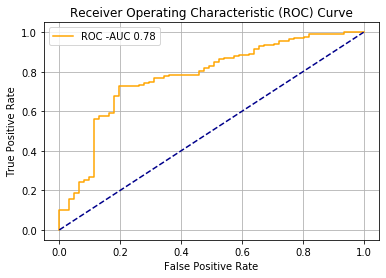

In [20]:
predictions = mlp.predict(X_test)
probs = mlp.predict_proba(X_test)
auc=analize_data(X_test,y_test,predictions,probs)

In [21]:
a,b=confusion_matrix(y_test, predictions)
Comp_DF['MLP']['Indicator']=0*a[0]+0*b[1]-(a[1]*5+b[0])/len(y_test)
Comp_DF['MLP']['AUC']=auc

In [22]:
mlp_u = MLPClassifier(hidden_layer_sizes=(100,40,100), max_iter=1000,verbose=True)  
mlp_u.fit(X_u_train, y_u_train.values.reshape(-1))  

Iteration 1, loss = 0.74356977
Iteration 2, loss = 0.70371296
Iteration 3, loss = 0.68457617
Iteration 4, loss = 0.67839691
Iteration 5, loss = 0.67187457
Iteration 6, loss = 0.66375959
Iteration 7, loss = 0.65385179
Iteration 8, loss = 0.64272015
Iteration 9, loss = 0.63165928
Iteration 10, loss = 0.61674819
Iteration 11, loss = 0.60102343
Iteration 12, loss = 0.58307185
Iteration 13, loss = 0.56458438
Iteration 14, loss = 0.54439967
Iteration 15, loss = 0.52707381
Iteration 16, loss = 0.51090734
Iteration 17, loss = 0.49445242
Iteration 18, loss = 0.48105584
Iteration 19, loss = 0.46763499
Iteration 20, loss = 0.45463267
Iteration 21, loss = 0.44131404
Iteration 22, loss = 0.42983241
Iteration 23, loss = 0.41657819
Iteration 24, loss = 0.40639004
Iteration 25, loss = 0.39414608
Iteration 26, loss = 0.38149135
Iteration 27, loss = 0.36925602
Iteration 28, loss = 0.35702212
Iteration 29, loss = 0.34618574
Iteration 30, loss = 0.33283684
Iteration 31, loss = 0.32139931
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 40, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

                 Predicted Negative  Predicted Positive
Actual Negative                  43                  18
Actual Positive                  38                 101


              precision    recall  f1-score   support

           0       0.53      0.70      0.61        61
           1       0.85      0.73      0.78       139

    accuracy                           0.72       200
   macro avg       0.69      0.72      0.69       200
weighted avg       0.75      0.72      0.73       200



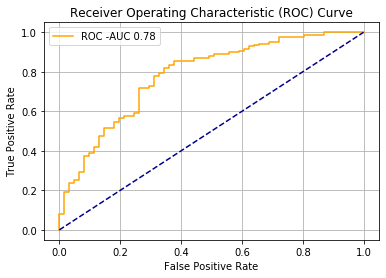

In [23]:
predictions = mlp_u.predict(X_test)
probs = mlp_u.predict_proba(X_test)
auc=analize_data(X_test,y_test,predictions,probs)

In [24]:
a,b=confusion_matrix(y_test, predictions)
Comp_DF['MLP_U']['Indicator']=0*a[0]+0*b[1]-(a[1]*5+b[0])/len(y_test)
Comp_DF['MLP_U']['AUC']=auc

                 Predicted Negative  Predicted Positive
Actual Negative                  37                  24
Actual Positive                  38                 101


              precision    recall  f1-score   support

           0       0.49      0.61      0.54        61
           1       0.81      0.73      0.77       139

    accuracy                           0.69       200
   macro avg       0.65      0.67      0.65       200
weighted avg       0.71      0.69      0.70       200



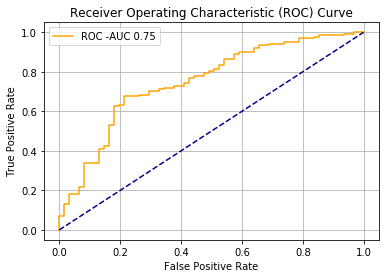

In [25]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions = gnb.predict(X_test)
probs = gnb.predict_proba(X_test)
auc=analize_data(X_test,y_test,predictions,probs)

In [26]:
a,b=confusion_matrix(y_test, predictions)
Comp_DF['BAYES']['Indicator']=0*a[0]+0*b[1]-(a[1]*5+b[0])/len(y_test)
Comp_DF['BAYES']['AUC']=auc

                 Predicted Negative  Predicted Positive
Actual Negative                  35                  26
Actual Positive                  34                 105


              precision    recall  f1-score   support

           0       0.51      0.57      0.54        61
           1       0.80      0.76      0.78       139

    accuracy                           0.70       200
   macro avg       0.65      0.66      0.66       200
weighted avg       0.71      0.70      0.70       200



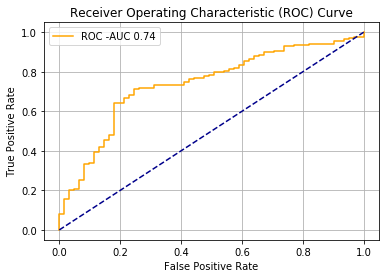

In [27]:
gnb_u = GaussianNB()
gnb_u.fit(X_u_train, y_u_train)
predictions = gnb_u.predict(X_test)
probs = gnb_u.predict_proba(X_test)
auc=analize_data(X_test,y_test,predictions,probs)

In [28]:
a,b=confusion_matrix(y_test, predictions)
Comp_DF['BAYES_U']['Indicator']=0*a[0]+0*b[1]-(a[1]*5+b[0])/len(y_test)
Comp_DF['BAYES_U']['AUC']=auc

                 Predicted Negative  Predicted Positive
Actual Negative                  21                  40
Actual Positive                   7                 132


              precision    recall  f1-score   support

           0       0.75      0.34      0.47        61
           1       0.77      0.95      0.85       139

    accuracy                           0.77       200
   macro avg       0.76      0.65      0.66       200
weighted avg       0.76      0.77      0.73       200



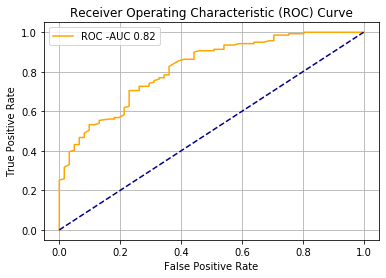

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
probs = rfc.predict_proba(X_test)
auc=analize_data(X_test,y_test,predictions,probs)

In [30]:
a,b=confusion_matrix(y_test, predictions)
Comp_DF['FOREST']['Indicator']=0*a[0]+0*b[1]-(a[1]*5+b[0])/len(y_test)
Comp_DF['FOREST']['AUC']=auc

                 Predicted Negative  Predicted Positive
Actual Negative                  41                  20
Actual Positive                  33                 106


              precision    recall  f1-score   support

           0       0.55      0.67      0.61        61
           1       0.84      0.76      0.80       139

    accuracy                           0.73       200
   macro avg       0.70      0.72      0.70       200
weighted avg       0.75      0.73      0.74       200



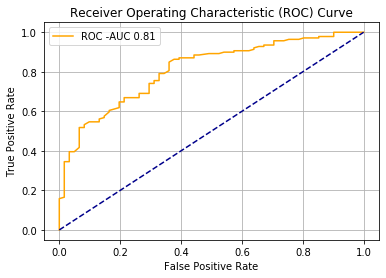

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc_u=RandomForestClassifier(n_estimators=500)
rfc_u.fit(X_u_train,y_u_train)
predictions = rfc_u.predict(X_test)
probs = rfc_u.predict_proba(X_test)
auc = analize_data(X_test,y_test,predictions,probs)

In [32]:
a,b=confusion_matrix(y_test, predictions)
Comp_DF['FOREST_U']['Indicator']=0*a[0]+0*b[1]-(a[1]*5+b[0])/len(y_test)
Comp_DF['FOREST_U']['AUC']=auc

System Proposotion

In [33]:
def Predictions(sample_X):

    pred_gnb = gnb.predict(sample_X)
    pred_rfc = rfc.predict(sample_X)
    pred_mlp = mlp.predict(sample_X)
    
    voting=round((pred_gnb[0]+pred_rfc[0]+pred_mlp[0])/3)
    if voting:
        pred_u_gnb = gnb_u.predict(sample_X)
        pred_u_rfc  = rfc_u.predict(sample_X)
        pred_u_mlp  = mlp_u.predict(sample_X)
        
        prob_u_gnb = gnb_u.predict_proba(sample_X)[0]
        prob_u_rfc = rfc_u.predict_proba(sample_X)[0]
        prob_u_mlp = mlp_u.predict_proba(sample_X)[0]
        
        voting=round((pred_u_gnb[0]+pred_u_rfc[0]+pred_u_mlp[0])/3)
        prob=max(prob_u_gnb,prob_u_rfc,prob_u_mlp,key=lambda x: x[1]) if voting \
             else min(prob_u_gnb,prob_u_rfc,prob_u_mlp,key=lambda x: x[1])
        
    else:
        prob_gnb = gnb.predict_proba(sample_X)[0]
        prob_rfc = rfc.predict_proba(sample_X)[0]
        prob_mlp = mlp.predict_proba(sample_X)[0]
        prob=min(prob_gnb,prob_rfc,prob_mlp, key=lambda x: x[1])
    return voting,prob

In [34]:
predictions=[]
probs=[]
for index, sample_X in X_test.iterrows():
    sample_X=sample_X.values.reshape(1,-1)
    voting,prob=Predictions(sample_X)
    predictions.append(voting)
    probs.append([prob[0],prob[1]])
    

                 Predicted Negative  Predicted Positive
Actual Negative                  44                  17
Actual Positive                  30                 109


              precision    recall  f1-score   support

           0       0.59      0.72      0.65        61
           1       0.87      0.78      0.82       139

    accuracy                           0.77       200
   macro avg       0.73      0.75      0.74       200
weighted avg       0.78      0.77      0.77       200



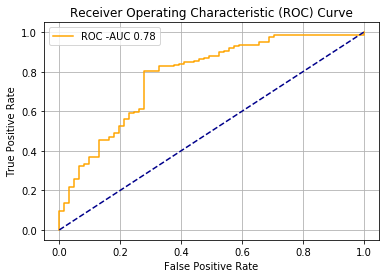

In [35]:
auc = analize_data(X_test,y_test,predictions,np.array(probs))


In [36]:
a,b=confusion_matrix(y_test, predictions)
Comp_DF['HYBRID']['Indicator']=0*a[0]+0*b[1]-(a[1]*5+b[0])/len(y_test)
Comp_DF['HYBRID']['AUC']=auc
Comp_DF_T=Comp_DF.transpose()

In [37]:
Comp_DF

,MLP,MLP_U,BAYES,BAYES_U,FOREST,FOREST_U,HYBRID
AUC,0.775209,0.781696,0.749617,0.737351,0.818139,0.809824,0.778276
Indicator,-0.875000,-0.640000,-0.790000,-0.820000,-1.035000,-0.665000,-0.575000


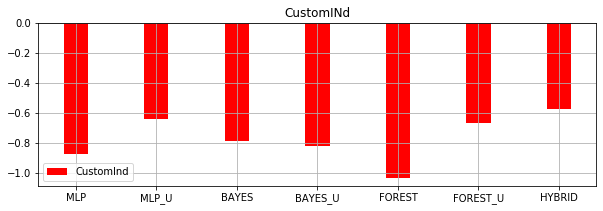

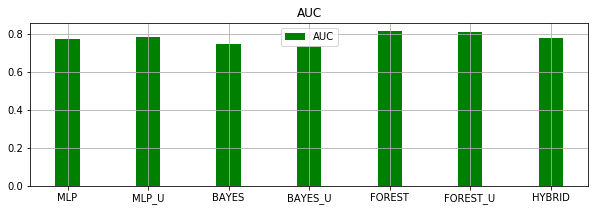

In [38]:
plt.figure(figsize=(10,3))
plt.bar(Comp_DF_T.index.values,Comp_DF_T['Indicator'],width=0.3,label='CustomInd',color='red',)
plt.title('CustomINd')
plt.legend()
plt.grid()

plt.figure(figsize=(10,3))
plt.bar(Comp_DF_T.index.values,Comp_DF_T['AUC'],width=0.3,label='AUC',color='green',)
plt.title('AUC')
plt.legend()
plt.grid()

Features research

In [39]:
Features=list(zip(X.columns,rfc.feature_importances_))
Features.sort(key=lambda b: b[1],reverse=True)
Features

[('creditamount', 0.11470040927422157),
 ('age', 0.09460546026236141),
 ('duration', 0.0896585801388488),
 ('existingchecking_A14', 0.06892690395757906),
 ('installmentrate', 0.040977843654033494),
 ('residencesince', 0.039753902018641284),
 ('credithistory_A34', 0.025992301214399247),
 ('existingcredits', 0.021606235473784395),
 ('existingchecking_A12', 0.021599325017476606),
 ('telephone_A192', 0.02074197844372722),
 ('otherinstallmentplans_A143', 0.020530214801484217),
 ('savings_A65', 0.019224449487773243),
 ('statussex_A93', 0.01887904135401995),
 ('housing_A152', 0.018707750029214158),
 ('purpose_A43', 0.018275314966045026),
 ('employmentsince_A73', 0.017962327505825423),
 ('property_A122', 0.017450024312154075),
 ('job_A173', 0.017377998901794683),
 ('statussex_A92', 0.016937853193539288),
 ('property_A123', 0.016634829445265148),
 ('employmentsince_A72', 0.01610767044003756),
 ('credithistory_A32', 0.016049973785885078),
 ('purpose_A42', 0.016007228551999358),
 ('employmentsinc

In [40]:
mostImportantFeatures=[x for x in Features if x[1]>np.mean(rfc.feature_importances_)]
mostImportantFeatures

[('creditamount', 0.11470040927422157),
 ('age', 0.09460546026236141),
 ('duration', 0.0896585801388488),
 ('existingchecking_A14', 0.06892690395757906),
 ('installmentrate', 0.040977843654033494),
 ('residencesince', 0.039753902018641284),
 ('credithistory_A34', 0.025992301214399247),
 ('existingcredits', 0.021606235473784395),
 ('existingchecking_A12', 0.021599325017476606)]

Histograms

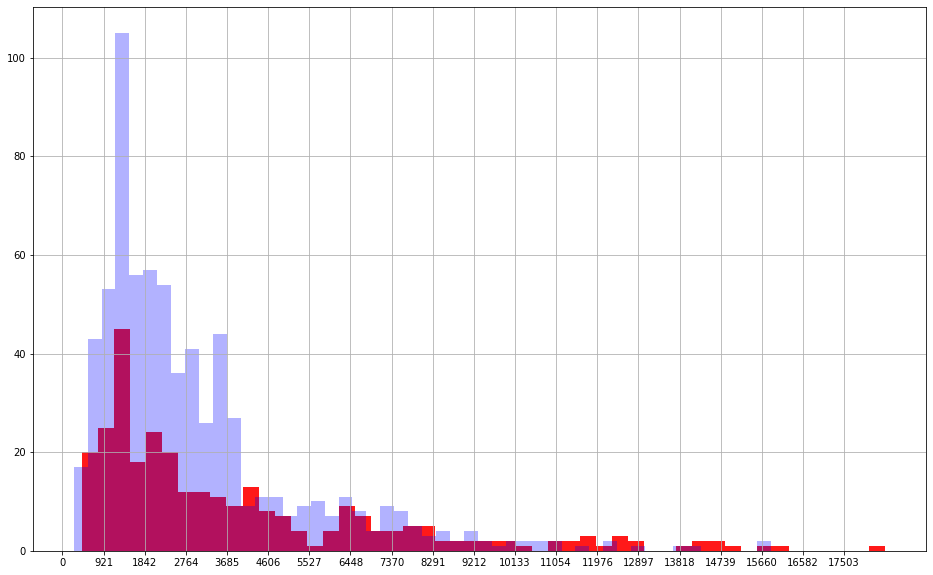

In [41]:
plot_hist('classification','creditamount',data,50,(16,10),True)

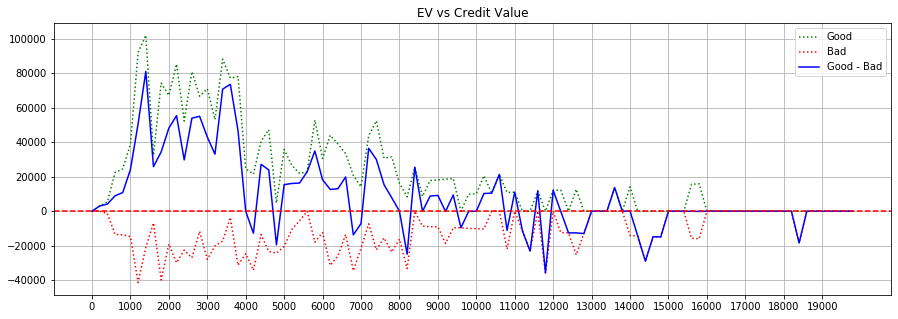

In [42]:
credit_dict={0: [],1 :[],2: [],3: []}
step=200
for cr in range(0,20000,step):
    credit_dict[0].append(cr)
    credit_dict[1].append(
    data[(data['classification']==1) &  (data['creditamount']>=cr) \
         & (data['creditamount']<cr+step)]['creditamount'].sum())
    credit_dict[2].append(-
    data[(data['classification']==0) &  (data['creditamount']>=cr) \
         & (data['creditamount']<cr+step)]['creditamount'].sum())
    credit_dict[3].append(credit_dict[1][-1]+credit_dict[2][-1])
credit_df=pd.DataFrame.from_dict(credit_dict)
#data
#pd.DataFrame.from_dict(credit_dict)
plt.figure(figsize=(15,5))
plt.plot(credit_df[0],credit_df[1],color='green',linestyle='dotted',label='Good')
plt.plot(credit_df[0],credit_df[2],color='red',linestyle='dotted',label='Bad')
plt.plot(credit_df[0],credit_df[3],color='blue',label='Good - Bad')
plt.axhline(y=0,color='red',linestyle='--')
plt.xticks(np.arange(0, 20000, 1000))
plt.title('EV vs Credit Value')
plt.legend()
plt.grid()


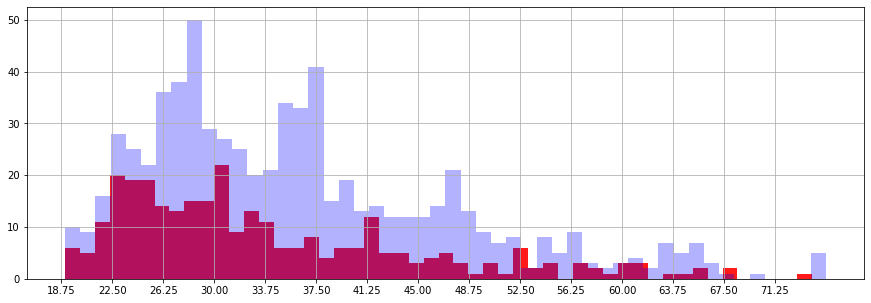

In [43]:
plot_hist('classification','age',data,50,(15,5),True)

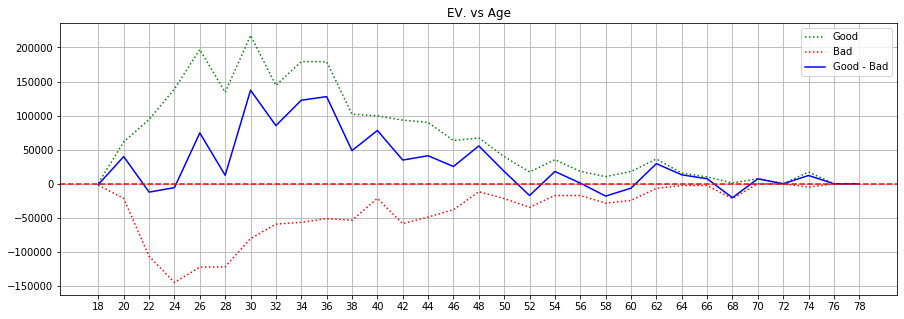

In [44]:
age_dict={0: [],1 :[], 2:[], 3:[]}
step=2
for ag in range(18,80,step):
    age_dict[0].append(ag)
    
    age_dict[1].append(data[\
                           (data['classification']==1)\
                       &   (data['age']>=ag) \
                       &   (data['age']<ag+step)\
                           ]['creditamount'].sum())
    age_dict[2].append(-data[\
                           (data['classification']==0)\
                       &   (data['age']>=ag) \
                       &   (data['age']<ag+step)\
                           ]['creditamount'].sum())
    
    age_dict[3].append(age_dict[1][-1]+age_dict[2][-1])
    
age_df=pd.DataFrame.from_dict(age_dict)

plt.figure(figsize=(15,5))
plt.plot(age_df[0],age_df[1],color='green',linestyle='dotted',label='Good')
plt.plot(age_df[0],age_df[2],color='red',linestyle='dotted',label='Bad')
plt.plot(age_df[0],age_df[3],color='blue',label='Good - Bad')
plt.axhline(y=0,color='red',linestyle='--')
plt.xticks(np.arange(18, 80, 2))
plt.title('EV. vs Age')
plt.legend()
plt.grid()

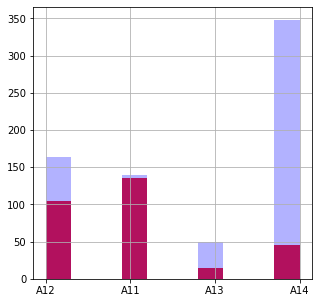

In [45]:
plot_hist('classification','existingchecking',data,10,(5,5))

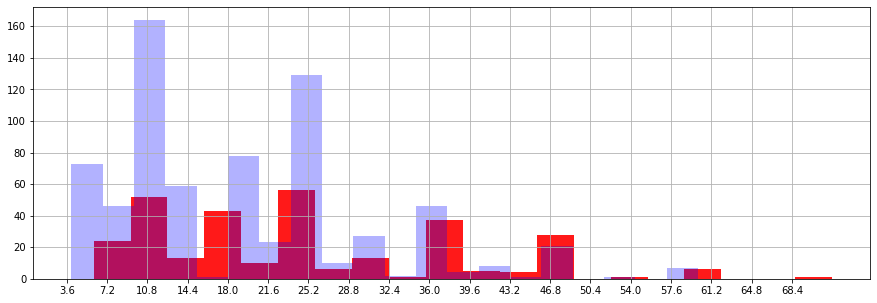

In [46]:
plot_hist('classification','duration',data,20,(15,5),True)

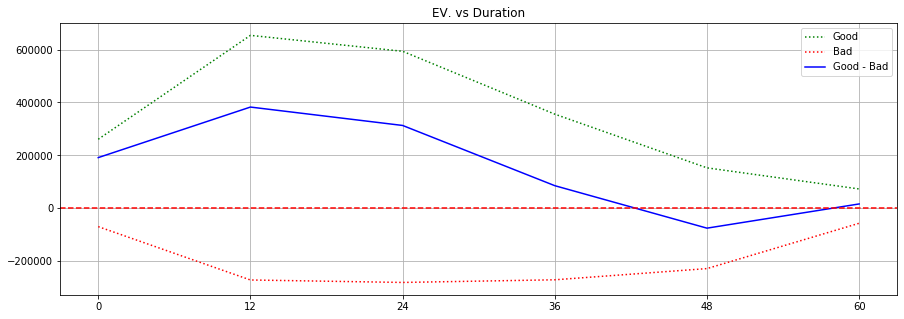

In [47]:
dur_dict={0: [],1 :[], 2:[], 3:[]}
step=12
for du in range(0,72,step):
    dur_dict[0].append(du)
    
    dur_dict[1].append(data[\
                           (data['classification']==1)\
                       &   (data['duration']>=du) \
                       &   (data['duration']<du+step)\
                           ]['creditamount'].sum())
    dur_dict[2].append(-data[\
                           (data['classification']==0)\
                       &   (data['duration']>=du) \
                       &   (data['duration']<du+step)\
                           ]['creditamount'].sum())
    
    dur_dict[3].append(dur_dict[1][-1]+dur_dict[2][-1])
    
dur_df=pd.DataFrame.from_dict(dur_dict)

plt.figure(figsize=(15,5))
plt.plot(dur_df[0],dur_df[1],color='green',linestyle='dotted',label='Good')
plt.plot(dur_df[0],dur_df[2],color='red',linestyle='dotted',label='Bad')
plt.plot(dur_df[0],dur_df[3],color='blue',label='Good - Bad')
plt.axhline(y=0,color='red',linestyle='--')
plt.xticks(np.arange(0, 72, step))
plt.title('EV. vs Duration')
plt.legend()
plt.grid()

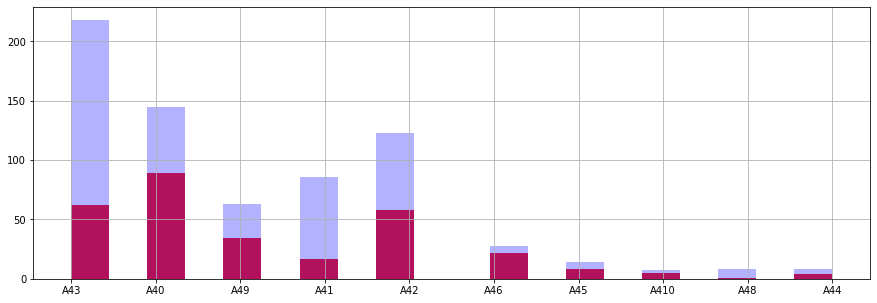

In [48]:
plot_hist('classification','purpose',data,20,(15,5))

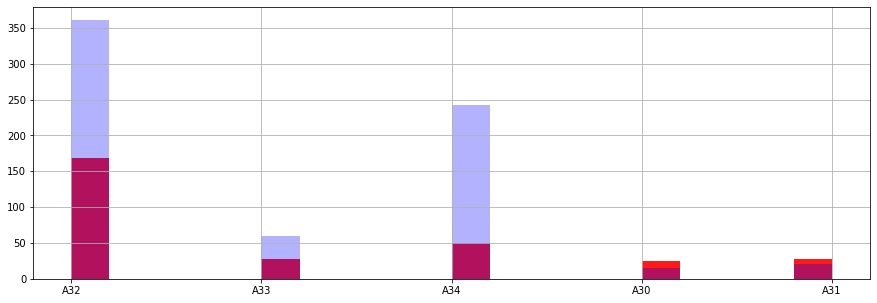

In [49]:
plot_hist('classification','credithistory',data,20,(15,5))

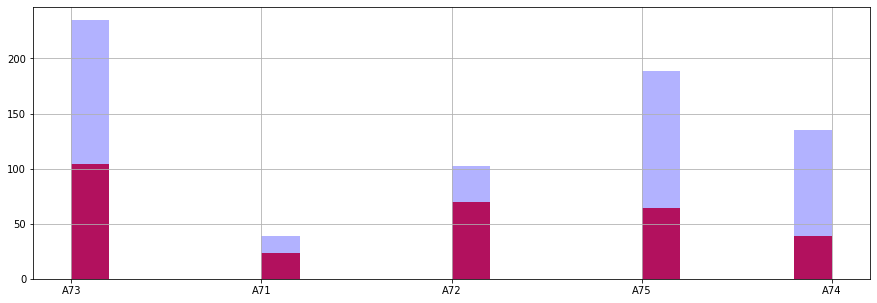

In [50]:
plot_hist('classification','employmentsince',data,20,(15,5))

ADDITIONAL RESEARCH

In [51]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
cn=['good','bad']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=1200)
tree.plot_tree(dtree, 
               class_names=cn,
               feature_names =numvars+catvars,
               filled = True)
fig.savefig('tree2.png')

IndexError: list index out of range

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,svd_solver='full')
pca.fit(X)
x_pca=pca.transform(X)
x_pca.shape,X.shape

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)


In [ ]:
import seaborn as sb
components=pd.DataFrame(pca.components_,columns=numvars+catvars)
components
plt.figure(figsize=(15,5))
sb.heatmap(components,cmap='plasma')

In [ ]:
plt.figure(figsize=(15,10))
sb.heatmap(data_prep.corr());

In [ ]:
plot_hist('classification','savings',data,20,(15,5))